In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [20]:
deaths = pd.read_excel("Indicator_Annual number of AIDS deaths.xlsx")
peoplewithaids = pd.read_excel("indicator_hiv_plwha.xlsx")
expectativadevida = pd.read_excel('indicator life_expectancy_at_birth.xlsx')
newlyinfected = pd.read_excel("Indicator_Estimated new HIV cases All ages.xlsx")
totalpopulation = pd.read_excel("indicator gapminder population.xlsx")

#https://aidsinfo.unaids.org/
newlyinfected_south_eastern_africa_2018 = pd.read_excel("New HIV infections_Number of new HIV infections_Population_2018.xlsx")
newlyinfected_south_eastern_africa_2017 =pd.read_excel("New HIV infections_Number of new HIV infections_Population_2017.xlsx")
receivingART_south_eastern_africa_2017 = pd.read_excel("Treatment cascade_People living with HIV receiving ART (#)_Population_ All ages_2017.xlsx")
receivingART_south_eastern_africa_2018 = pd.read_excel("Treatment cascade_People living with HIV receiving ART (#)_Population_ All ages_2018.xlsx")
livingwithHIV2017 = pd.read_excel("People living with HIV 2017.xlsx")
livingwithHIV2018 = pd.read_excel("People living with HIV 2018.xlsx")

In [22]:
peoplewithaids=peoplewithaids.rename(columns = {"People living with HIV":'Pessoas vivendo com HIV', "1996": 1996, "2001":2001})
peoplewithaids_idx=peoplewithaids.set_index("Pessoas vivendo com HIV")
peoplewithaids_idx=peoplewithaids_idx.dropna()

#--------------------------------------- OLHAR AQUI
deaths=deaths.rename(columns = {"Annual number of AIDS deaths":'Mortes por AIDS'})
deaths_idx=deaths.set_index("Mortes por AIDS")
deaths_idx.columns = deaths_idx.columns.astype(int)
deaths_idx=deaths_idx.dropna()

expectativadevida=expectativadevida.rename(columns={"Life expectancy":"Expectativa de vida"})
expectativadevida_idx=expectativadevida.set_index("Expectativa de vida")
expectativadevida_idx=expectativadevida_idx.dropna()

newlyinfected=newlyinfected.rename(columns={"Estimated new HIV infections":"Incidencia de HIV em novas pessoas"})
newlyinfected_idx=newlyinfected.set_index("Incidencia de HIV em novas pessoas")
newlyinfected_idx=newlyinfected_idx.dropna()

totalpopulation=totalpopulation.rename(columns={"Total population":"População total"})
totalpopulation_idx=totalpopulation.set_index("População total")
totalpopulation_idx=totalpopulation_idx.dropna()

newlyinfected_south_eastern_africa_2017=newlyinfected_south_eastern_africa_2017.rename(columns={"Selected Regions":"Países", "For The Year 2017":"Novos infectados em 2017"})
newlyinfected_south_eastern_africa_idx2017=newlyinfected_south_eastern_africa_2017.set_index("Países")

newlyinfected_south_eastern_africa_2018=newlyinfected_south_eastern_africa_2018.rename(columns={"Selected Regions":"Países", "For The Year 2018":"Novos infectados em 2018"})
newlyinfected_south_eastern_africa_idx2018=newlyinfected_south_eastern_africa_2018.set_index("Países")

receivingART_south_eastern_africa_2017=receivingART_south_eastern_africa_2017.rename(columns={"Selected Regions":"Países", "For The Year 2017":"Recebendo ART em 2017"})
receivingART_south_eastern_africa_idx2017=receivingART_south_eastern_africa_2017.set_index("Países")

receivingART_south_eastern_africa_2018=receivingART_south_eastern_africa_2018.rename(columns={"Selected Regions":"Países", "For The Year 2018":"Recebendo ART em 2018"})
receivingART_south_eastern_africa_idx2018=receivingART_south_eastern_africa_2018.set_index("Países")

livingwithHIV2017=livingwithHIV2017.rename(columns={"Selected Regions":"Países", "For The Year 2017":"Pessoas com HIV em 2017"})
livingwithHIV2017_idx=livingwithHIV2017.set_index("Países")

livingwithHIV2018=livingwithHIV2018.rename(columns={"Selected Regions":"Países", "For The Year 2018":"Pessoas com HIV em 2017"})
livingwithHIV2018_idx=livingwithHIV2018.set_index("Países")

In [4]:
#convertendo tabelas e plotando comportamento relativo médio
peoplewithaids_num = peoplewithaids_idx.apply(pd.to_numeric)
totalpopulation_num = totalpopulation_idx.apply(pd.to_numeric)
peoplewithaids_num.columns = peoplewithaids_num.columns.astype(int)
totalpopulation_num.columns = totalpopulation_num.columns.astype(int)

comportamentorelativo_peoplewithaids= peoplewithaids_num/totalpopulation_num


**Gráfico de comportamento relativo ao longo dos anos - PESSOAS COM AIDS**

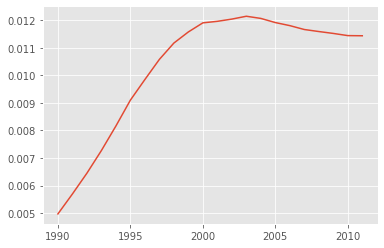

In [5]:
plt.plot(comportamentorelativo_peoplewithaids.mean().index, comportamentorelativo_peoplewithaids.mean())

**Comportamento relativo médio - MORTE - todos os países**

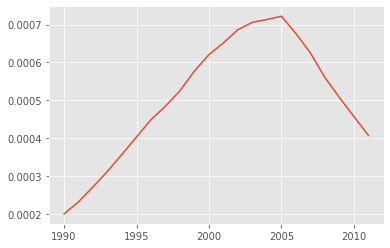

In [6]:
deaths_num = deaths_idx.apply(pd.to_numeric)
deaths_num.columns = deaths_num.columns.astype(int)
comportamentorelativo_mortes= deaths_num/totalpopulation_num

plt.plot(comportamentorelativo_mortes.mean().index, comportamentorelativo_mortes.mean())

**Comportamento relativo médio - NOVAS INFECÇÕES - todos os países**

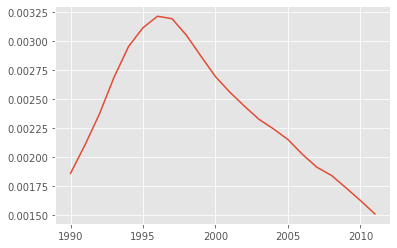

In [7]:
newlyinfected_idx = newlyinfected_idx.apply(pd.to_numeric)
newlyinfected_idx.columns = newlyinfected_idx.columns.astype(int)

comportamentorelativo_novosinfectados= newlyinfected_idx/totalpopulation_num
plt.plot(comportamentorelativo_novosinfectados.mean().index, comportamentorelativo_novosinfectados.mean())


In [23]:
juncaodosdados=receivingART_south_eastern_africa_idx2017.join(receivingART_south_eastern_africa_idx2018, how="inner")
juncaodosdados=juncaodosdados.join(newlyinfected_south_eastern_africa_idx2017, how="inner")
juncaodosdados=juncaodosdados.join(newlyinfected_south_eastern_africa_idx2018, how="inner")
juncaodosdados=juncaodosdados.join(livingwithHIV2017_idx, how="inner")
juncaodosdados=juncaodosdados.join(livingwithHIV2018_idx, how="inner")

juncaodosdados

,Recebendo ART em 2017,Recebendo ART em 2018,Novos infectados em 2017,Novos infectados em 2018,Vivendo com HIV em 2017,Vivendo com HIV em 2018
Países,,,,,,
Angola,78721,88734,29000 [22000 - 36000],28000 [21000 - 36000],320000 [280000 - 380000],330000 [290000 - 390000]
Botswana,285983,307377,9000 [7600 - 10000],8500 [7000 - 10000],370000 [330000 - 400000],370000 [330000 - 400000]
Comoros,95,96,0 [ - 10],0 [ - 10],120 [60 - 240],120 [60 - 240]
Eritrea,8795,8907,610 [330 - 1100],580 [300 - 1000],18000 [13000 - 24000],18000 [13000 - 24000]
Ethiopia,437555,449962,23000 [14000 - 42000],23000 [14000 - 40000],680000 [520000 - 890000],690000 [530000 - 900000]
Kenya,1121938,1067636,48000 [28000 - 82000],46000 [27000 - 78000],1500000 [1300000 - 1900000],1600000 [1300000 - 1900000]
Lesotho,201758,206298,14000 [13000 - 16000],13000 [11000 - 15000],340000 [320000 - 360000],340000 [320000 - 360000]
Madagascar,2321,3510,5200 [3500 - 8800],6100 [3800 - 11000],35000 [28000 - 46000],39000 [30000 - 55000]
Mozambique,1051568,1212562,150000 [91000 - 230000],150000 [90000 - 220000],2100000 [1700000 - 2600000],2200000 [1700000 - 2700000]


In [24]:
listapaises_analise = ['Angola',  'Ethiopia',  'Kenya',  'Lesotho',    'Malawi', 'Namibia',  'Rwanda', 'South Africa',  'Uganda',   'Zimbabwe', 'Madagascar','Mauritius','Sudan']
selftest_not_available=["Angola", "Ethiopia", "Rwanda", 'Uganda', 'Zambia','Botswana',]

juncaodosdados.loc[:, "selftestavailable"] = "sim"
juncaodosdados.loc[selftest_not_available, "selftestavailable"] = "não"
selftest_status_2017= juncaodosdados.selftestavailable.value_counts()

juncaodosdados

,Recebendo ART em 2017,Recebendo ART em 2018,Novos infectados em 2017,Novos infectados em 2018,Vivendo com HIV em 2017,Vivendo com HIV em 2018,selftestavailable
Países,,,,,,,
Angola,78721,88734,29000 [22000 - 36000],28000 [21000 - 36000],320000 [280000 - 380000],330000 [290000 - 390000],não
Botswana,285983,307377,9000 [7600 - 10000],8500 [7000 - 10000],370000 [330000 - 400000],370000 [330000 - 400000],não
Comoros,95,96,0 [ - 10],0 [ - 10],120 [60 - 240],120 [60 - 240],sim
Eritrea,8795,8907,610 [330 - 1100],580 [300 - 1000],18000 [13000 - 24000],18000 [13000 - 24000],sim
Ethiopia,437555,449962,23000 [14000 - 42000],23000 [14000 - 40000],680000 [520000 - 890000],690000 [530000 - 900000],não
Kenya,1121938,1067636,48000 [28000 - 82000],46000 [27000 - 78000],1500000 [1300000 - 1900000],1600000 [1300000 - 1900000],sim
Lesotho,201758,206298,14000 [13000 - 16000],13000 [11000 - 15000],340000 [320000 - 360000],340000 [320000 - 360000],sim
Madagascar,2321,3510,5200 [3500 - 8800],6100 [3800 - 11000],35000 [28000 - 46000],39000 [30000 - 55000],sim
Mozambique,1051568,1212562,150000 [91000 - 230000],150000 [90000 - 220000],2100000 [1700000 - 2600000],2200000 [1700000 - 2700000],sim


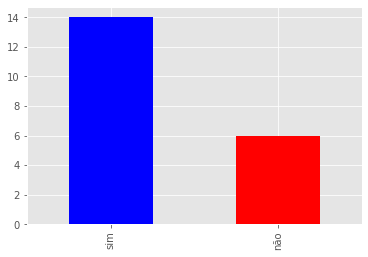

In [15]:
selftest_status_2017.plot(kind='bar', color=('blue', 'red'), legend=False)

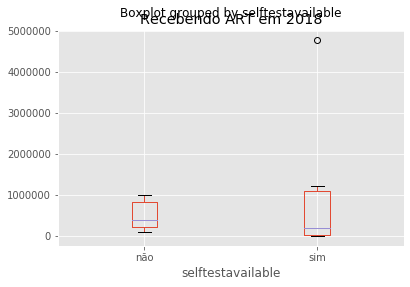

In [16]:
juncaodosdados.boxplot(column="Recebendo ART em 2018", by="selftestavailable")
